In [2]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plot

import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate

import itertools
from itertools import product
import seaborn as sns
import json
import sklearn
from sklearn import linear_model
from sklearn import ensemble

import pandas as pd
import csv

## Чтение из файла

In [3]:
DATA = []

path = "AllMoviesDetailsCleaned.csv"
with open(path, 'r', -1, 'utf-8') as csvfile:
  for row in csv.reader(csvfile, delimiter=';'):
    DATA.append(row)

In [4]:
len(DATA)

329045

## Столбцы в таблице рейтинга

In [5]:
nnn=0

for s in DATA[0] :
    print (nnn,' ',s)
    nnn=nnn+1

0   ﻿id
1   budget
2   genres
3   imdb_id
4   original_language
5   original_title
6   overview
7   popularity
8   production_companies
9   production_countries
10   release_date
11   revenue
12   runtime
13   spoken_languages
14   status
15   tagline
16   title
17   vote_average
18   vote_count
19   production_companies_number
20   production_countries_number
21   spoken_languages_number


## Чистый список данных

In [67]:
DTAIL = DATA[1:]
DATA_CLEAN = [x for x in DTAIL if float(x[18]) > 127]

len(DATA_CLEAN)

4907

In [68]:
print(DATA_CLEAN[2])

['12', '94000000', 'Animation|Family', 'tt0266543', 'en', 'Finding Nemo', "Nemo, an adventurous young clownfish, is unexpectedly taken from his Great Barrier Reef home to a dentist's office aquarium. It's up to his worrisome father Marlin and a friendly but forgetful fish Dory to bring Nemo home -- meeting vegetarian sharks, surfer dude turtles, hypnotic jellyfish, hungry seagulls, and more along the way.", '9.915573', 'Pixar Animation Studios', 'United States of America', '30/05/2003', '940335536', '100', 'English', 'Released', "There are 3.7 trillion fish in the ocean, they're looking for one.", 'Finding Nemo', '7.6', '5531', '1', '1', '1']


## Выделение года

In [69]:
yr = lambda s : s[6:]
print(yr ('27/11/1997'))

1997


## Числовые данные

In [70]:
DATA_FW = [
  [int(x[1]),                                        # Бюджет
     int(x[11]),                                     # Выручка
     int(x[18]),                                     # Количество голосовавших 
     int(x[12]),                                     # Длительность
     float(x[7]),                                    # Популярность
     len(x[15]),                                     # Длина слогана
     len(x[6]),                                      # Длина сюжета
     len(x[16]),                                     # Длина названия
     int(x[20]),                                     # Количество участвовавших стран
     int (yr (x[10])),                               # Год выпуска
       float(x[17])]                                 # Рейтинг
  for x in DATA_CLEAN
]

print(DATA_FW[2])

[94000000, 940335536, 5531, 100, 9.915573, 66, 333, 12, 1, 2003, 7.6]


## Нормализация

In [71]:
D_DATA_FW_p = [[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9]] for row in DATA_FW]
DATA_FW_a = [row[10] for row in DATA_FW]

In [72]:
norm = sklearn.preprocessing.StandardScaler()
DATA_FW_p = norm.fit_transform(D_DATA_FW_p)

## Тестовое и обучающее множества

In [73]:
Ap = []

for x in range (0, len (DATA_FW_p) - 1) :
    if (x % 10 == 0) :
        Ap.append(DATA_FW_p[x])

Tp = []

for x in range (0, len (DATA_FW_p) - 1) :
    if (x % 10 != 0) :
        Tp.append(DATA_FW_p[x])
        
Aa = []

for x in range (0, len (DATA_FW_a) - 1) :
    if (x % 10 == 0) :
        Aa.append(DATA_FW_a[x])

Ta = []

for x in range (0, len (DATA_FW_a) - 1) :
    if (x % 10 != 0) :
        Ta.append(DATA_FW_a[x])


## Линейная регрессия

In [74]:
ERRORS = []

MODEL = linear_model.LinearRegression(fit_intercept=True).fit(Tp, Ta)
PRED = MODEL.predict (Ap)
    
ERRORS.append (math.sqrt(sklearn.metrics.mean_squared_error (Aa, PRED)))
print (sum(ERRORS)/float(len(ERRORS)))

0.7054559246044632


In [75]:
print(MODEL.coef_)

[-0.28055795 -0.05424942  0.391641    0.18267294  0.03738657 -0.03031426
 -0.01385464 -0.0066123   0.01083846 -0.2503099 ]


## Картиночка

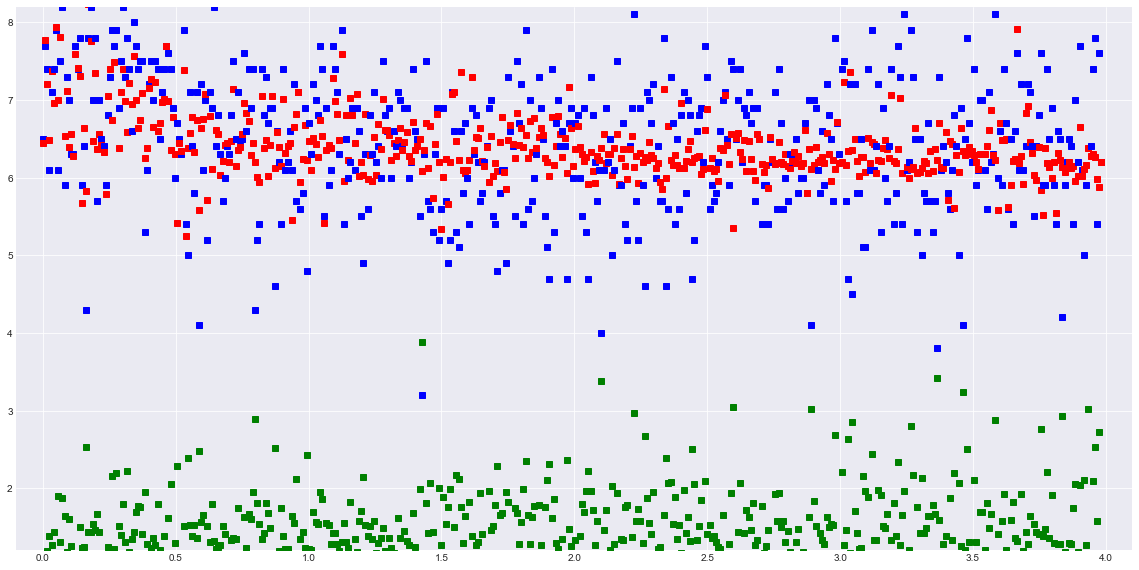

In [80]:
sns.set_style("darkgrid")
figsize = (20,10)
legend_fontsize = 13
sns.set_palette("colorblind")
palette = sns.color_palette()

fig = plot.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-0.1,4.1)
ax.set_ylim(1.2,8.2)

for i in range (0,(len(PRED)-1)):
    ax.plot(4*i/len(PRED), Aa[i], 'bs')
    ax.plot(4*i/len(PRED), PRED[i], 'rs')
    ax.plot(4*i/len(PRED), math.sqrt((Aa[i]-PRED[i])*(Aa[i]-PRED[i]))+1 , 'gs')
    
plot.show()